In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
img = cv2.imread('../data/supra.jpeg').astype(np.float)
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

In [3]:
# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

In [4]:
# sobel Filter
K_size = 3

In [7]:
# Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out_v = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out_h[pad: pad + H, pad: pad + W] = gray.copy().astype(np.float)

tmp = out_h.copy()

In [8]:
# Prewitt Filter Horizontal
K_h = [[-1., 0., 1.],[-1., 0., 1.],[-1., 0., 1.]]
## Prewitt Filter Vertical
K_v = [[-1., -1., -1.],[0., 0., 0.], [1., 1., 1.]]

In [9]:
for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h * tmp[y: y + K_size, x: x + K_size])
        out_v[pad + y, pad + x] = np.mean(K_v * tmp[y: y + K_size, x: x + K_size])
        
out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)
out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)

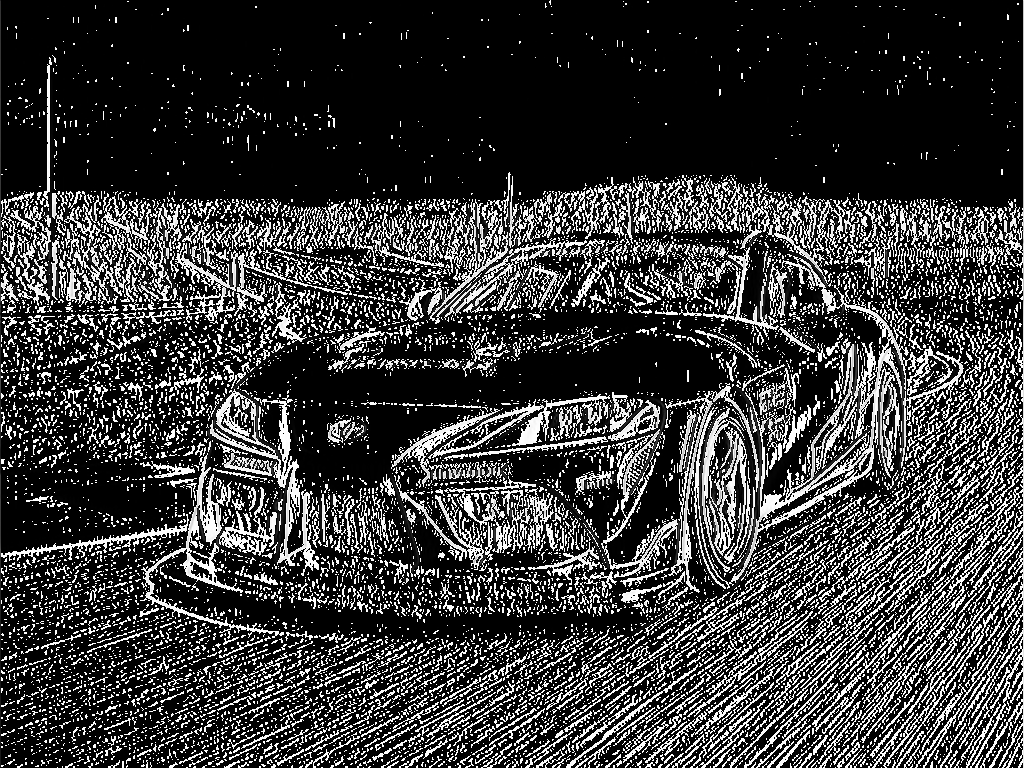

In [10]:
Image.fromarray(out_h)

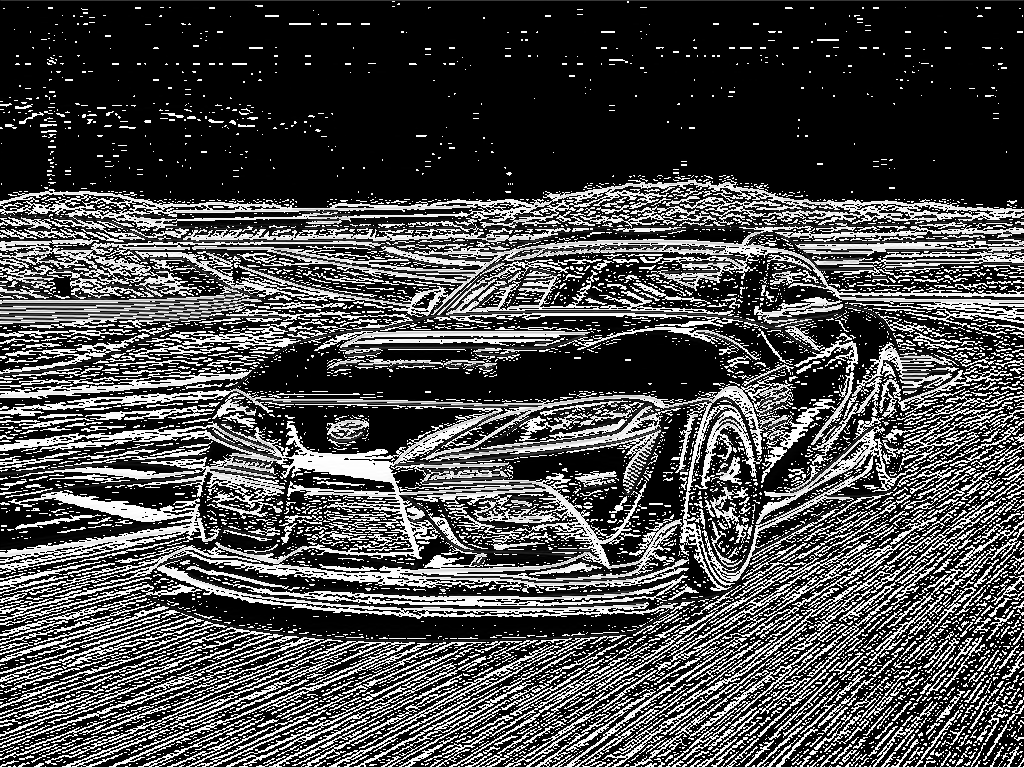

In [11]:
Image.fromarray(out_v)

In [12]:
cv2.imwrite('./out16_PrewittFilter_h.jpg', out_h)
cv2.imwrite('./out16_PrewittFilter_v.jpg', out_v)

True